### <center> INTRODUCTION

<div class="alert alert-block alert-info">
<span style="font-family:Comic Sans">
According to Wikipedia, Marketing mix modeling (MMM) is a statistical analysis such as multivariate regressions on sales and marketing time series data to estimate the impact of various marketing tactics (marketing mix) on sales and then forecast the impact of future sets of tactics.

The key purpose: By estimating the effectiveness of different marketing channels activities, MMM helps to better understand how various marketing activities are driving the business metrics of a product and increase ROI.
    
MMM model is often used to optimize the advertising expenditure for the next quarter or year. It enables the CMO and financial team make spending and allocation decisions. And also make investment decisions in terms of incremental spending.

<div class="alert alert-block alert-info">

<span style="font-family:Comic Sans"> 
Common Data Types for MMM
<ol>
<li>Base Variables:
    <ul>
<li>Seasonality: For example, sales during the Christmas season are generally high than average sales.</li>
<li>Macroeconomic Data: CCI, inflation, unemployment rate, GDP, etc.</li>
<li>Product Sales Price: base price, Avg. sales price</li>
<li>Distribution: No. of stores or No. of locations the product is available. The distribution chain can impact business outcomes. For example, the stock product may cause sales to decrease.</li></ul>
<li>Incremental Variables:
<ul><li>Advertising data: TV / Radio/ NewsPpapers / Magzines / Search/ Display / Social Media / sponsorship / Affiliation / Content Marketing etc.</li>
<li>Promotion data: No. of offers/days for which offers are provided. e.g. a price promotion like free delivery, 0% APR or cashback, etc is not supported by any advertisement that would also drive sales.</li></ul>
<li>Others:
<ul><li>Sales: It is impossible to build a MMM model without the sales variable. is generally considered as a dependent variable in MMM. Sales can be in volume in units as well as revenue.</li>
<li> Advertising spends data: Get the spend data from the internal marketing team or through an external marketing agency.
</li> 

<h3><center>PROBLEM STATEMENT</center></h3>

<div class="alert alert-block alert-info">


ElecKart is an e-commerce firm based out of Ontario, Canada specialising in electronic products. Over the last one year, they had spent a significant amount of money on marketing. Occasionally, they had also offered big-ticket promotions (similar to the Big Billion Day). They are about to create a marketing budget for the next year, which includes spending on commercials, online campaigns, and pricing & promotion strategies. The CFO feels that the money spent over the last 12 months on marketing was not sufficiently impactful, and, that they can either cut on the budget or reallocate it optimally across marketing levers to improve the revenue response.

Imagine that you are a part of the marketing team working on budget optimisation. You need to develop a market mix model to observe the actual impact of different marketing variables over the last year. Using your understanding of the model, you have to recommend the optimal budget allocation for different marketing levers for the next year.

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("ConsumerElectronics.csv")
df

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400,1,\N,\N,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1648819,VPLEYAP3ZYYUVESU,2015-09-27 19:20:31,2015,9,4.402170e+15,4.402170e+15,2200,1,\N,\N,COD,7,-9.90634340213633E+017,7.89475898877674E+018,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2
1648820,VPLEYAP3ZYYUVESU,2015-09-28 01:32:58,2015,9,1.402393e+15,1.402393e+15,2098,1,\N,\N,COD,10,3.04892345453077E+018,-1.45758574108572E+018,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2
1648821,VPLEYAP3ZYYUVESU,2015-09-29 07:07:57,2015,9,4.403460e+15,4.403460e+15,2098,1,\N,\N,COD,5,-4.53140379455183E+018,5.74649014721365E+018,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2
1648822,VPLEYAP3ZYYUVESU,2015-09-29 18:15:45,2015,9,4.403860e+15,4.403860e+15,2200,1,\N,\N,COD,3,-8.94046418180233E+018,2.57294814079718E+018,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2


In [5]:
# Set dispplay option to display max columns
pd.set_option("display.max_columns", df.shape[-1]) 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   fsn_id                           1648824 non-null  object 
 1   order_date                       1648824 non-null  object 
 2   Year                             1648824 non-null  int64  
 3   Month                            1648824 non-null  int64  
 4   order_id                         1648824 non-null  float64
 5   order_item_id                    1648824 non-null  float64
 6   gmv                              1648824 non-null  object 
 7   units                            1648824 non-null  int64  
 8   deliverybdays                    1648824 non-null  object 
 9   deliverycdays                    1648824 non-null  object 
 10  s1_fact.order_payment_type       1648824 non-null  object 
 11  sla                              1648824 non-null 

In [8]:
df.isnull().sum()

fsn_id                             0
order_date                         0
Year                               0
Month                              0
order_id                           0
order_item_id                      0
gmv                                0
units                              0
deliverybdays                      0
deliverycdays                      0
s1_fact.order_payment_type         0
sla                                0
cust_id                            0
pincode                            0
product_analytic_super_category    0
product_analytic_category          0
product_analytic_sub_category      0
product_analytic_vertical          0
product_mrp                        0
product_procurement_sla            0
dtype: int64

In [10]:
df.duplicated().sum()

104843

In [12]:
df[df.duplicated(['fsn_id','order_date','order_id','order_item_id',
                              'gmv','cust_id','pincode',
                              'product_analytic_category','product_analytic_sub_category',
                             'product_analytic_vertical'])]

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
76506,ACCE6YVWVHXXKCHW,2016-02-22 14:52:12,2016,2,3.417290e+15,3.417290e+15,350,1,7,8,Prepaid,8,-1.07035781735315E+018,8.45640885616433E+018,CE,GamingHardware,GamingAccessory,JoystickGamingWheel,599,2
276268,ACCEAD73KGPNFGUC,2015-11-09 09:59:14,2015,11,2.438985e+15,2.438985e+15,,2,\N,\N,Prepaid,4,,,CE,EntertainmentSmall,Speaker,MobileSpeaker,1490,3
675305,ACCE7AV9TZHHAESC,2016-04-27 07:03:09,2016,4,2.532858e+15,2.532858e+15,4090.0,1,2,3,Prepaid,5,233114630667481984.0,-4071447699433639936.0,CE,GamingHardware,GamingAccessory,GamePad,4990,2
863407,ACCEEHPA7NNKCAME,2016-04-27 00:36:42,2016,4,2.560763e+15,2.560763e+15,798.0,1,\N,\N,Prepaid,6,-4645405676797639680.0,479427064452622016.0,CE,CameraAccessory,CameraStorage,CameraStorageMemoryCard,1599,3
932794,VGLE6NYDQZHZFB3A,2016-04-27 00:15:53,2016,4,1.559543e+15,1.559543e+15,290.0,1,\N,\N,Prepaid,12,7385644561775210496.0,4501710668747489792.0,CE,EntertainmentSmall,TVVideoSmall,VideoGlasses,999,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1648819,VPLEYAP3ZYYUVESU,2015-09-27 19:20:31,2015,9,4.402170e+15,4.402170e+15,2200,1,\N,\N,COD,7,-9.90634340213633E+017,7.89475898877674E+018,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2
1648820,VPLEYAP3ZYYUVESU,2015-09-28 01:32:58,2015,9,1.402393e+15,1.402393e+15,2098,1,\N,\N,COD,10,3.04892345453077E+018,-1.45758574108572E+018,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2
1648821,VPLEYAP3ZYYUVESU,2015-09-29 07:07:57,2015,9,4.403460e+15,4.403460e+15,2098,1,\N,\N,COD,5,-4.53140379455183E+018,5.74649014721365E+018,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2
1648822,VPLEYAP3ZYYUVESU,2015-09-29 18:15:45,2015,9,4.403860e+15,4.403860e+15,2200,1,\N,\N,COD,3,-8.94046418180233E+018,2.57294814079718E+018,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2


In [13]:
#creating a copy of the dataframe for backup before making changes to it
df_copy=df.copy()

In [14]:
#Removing duplicated values
df_copy = df_copy[~df_copy.duplicated(['fsn_id','order_date','order_id','order_item_id',
                              'gmv','cust_id','pincode',
                              'product_analytic_category','product_analytic_sub_category',
                             'product_analytic_vertical'])]

In [16]:
df_copy.loc[df_copy.duplicated()]

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla


In [17]:
# Removing whitespaces and other extra characters
df_copy.replace(r'^\s+$', np.nan, regex=True, inplace = True)
df_copy.replace('\\N', np.nan, inplace = True)

In [19]:
# let's check the null percentage for each column
round(100*(df_copy.isnull().sum()/len(df_copy.index)), 2)

fsn_id                              0.00
order_date                          0.00
Year                                0.00
Month                               0.00
order_id                            0.00
order_item_id                       0.00
gmv                                 0.26
units                               0.00
deliverybdays                      78.25
deliverycdays                      78.25
s1_fact.order_payment_type          0.00
sla                                 0.00
cust_id                             0.26
pincode                             0.26
product_analytic_super_category     0.00
product_analytic_category           0.00
product_analytic_sub_category       0.00
product_analytic_vertical           0.38
product_mrp                         0.00
product_procurement_sla             0.00
dtype: float64

<div class="alert alert-block alert-info">
GMV stands for Gross Merchandise Value. It is a financial metric that represents the total value of merchandise or goods sold or transacted through a particular platform, marketplace, or business during a specified period. Null values in GMV indicate no sales, inactive period or data anomaly. Hence, we will remove nulls in GMV.


In [20]:
#removing null valued GMV
df_copy= df_copy.loc[~(df_copy.gmv.isnull())]

In [22]:
# let's check the null percentage for each column again
round(100*(df_copy.isnull().sum()/len(df_copy.index)), 2)

fsn_id                              0.00
order_date                          0.00
Year                                0.00
Month                               0.00
order_id                            0.00
order_item_id                       0.00
gmv                                 0.00
units                               0.00
deliverybdays                      78.20
deliverycdays                      78.20
s1_fact.order_payment_type          0.00
sla                                 0.00
cust_id                             0.00
pincode                             0.00
product_analytic_super_category     0.00
product_analytic_category           0.00
product_analytic_sub_category       0.00
product_analytic_vertical           0.38
product_mrp                         0.00
product_procurement_sla             0.00
dtype: float64

1. product_analytic_super_category, product_analytic_category, product_analytic_sub_category, product_analytic_vertical

In [23]:
# Let's drop the rows that have product analytic vertical as null.
df_copy = df_copy[~pd.isnull(df_copy.product_analytic_vertical)]

In [24]:
# Let's now check the product_analytic_super_category unique values
df_copy.product_analytic_super_category.unique()

array(['CE'], dtype=object)

In [25]:
#There is only one value for this column. Hence, we can remove the column.
df_copy.drop('product_analytic_super_category',1, inplace = True)

In [26]:
df_copy.product_analytic_category.unique()

array(['CameraAccessory', 'GamingHardware', 'EntertainmentSmall',
       'GameCDDVD', 'Camera'], dtype=object)

In [27]:
df_copy.product_analytic_sub_category.unique()

array(['CameraAccessory', 'GamingAccessory', 'Speaker', 'HomeAudio',
       'CameraStorage', 'AmplifierReceiver', 'AudioMP3Player', 'Game',
       'Camera', 'GamingConsole', 'HomeTheatre', 'AudioAccessory',
       'TVVideoSmall', 'GameMembershipCards'], dtype=object)

In [28]:
#The three product sub categories for the MMM are - camera accessory, home audio and gaming accessory.
#Removing the rows with other sub categories

df_copy = df_copy.loc[(df_copy.product_analytic_sub_category=='CameraAccessory') |
                       (df_copy.product_analytic_sub_category=='GamingAccessory')|
                       (df_copy.product_analytic_sub_category=='HomeAudio')]

2. GMV

In [29]:
#Let's convert the data type of GMV

df_copy['gmv'] = pd.to_numeric(df_copy['gmv'])

In [30]:
#Checking the minimum and maximum values of GMV
print(df_copy.gmv.min())
print(df_copy.gmv.max())

0.0
148050.0


gmv (Gross Merchendising Value - The cost price at which the item is sold multiplied by number of units) - Value at 0.0 seems odd.

Assumption : It could be because of any promotional offers, hence not deleting them

In [32]:
#Checking nulls in gmv value
df_copy.gmv.isnull().sum()

0

3. deliverybdays and deliverycdays

In [33]:
# The columns deliverybdays and deliverycdays are populated with \N, which is incorrect.
# Let's replace them with null.
print(df_copy.deliverybdays.value_counts().head())
print(df_copy.deliverycdays.value_counts().head())

4    23535
5    23058
3    18708
6    17915
2    10924
Name: deliverybdays, dtype: int64
5    21584
6    19605
4    18637
7    14137
3    13212
Name: deliverycdays, dtype: int64


In [34]:
print(df_copy.deliverybdays.isnull().sum()/len(df_copy))
print(df_copy.deliverycdays.isnull().sum()/len(df_copy))

0.7776837872695547
0.7776837872695547


In [35]:
# We can drop delivercdays and deliverybdays column as it has 79% null values.
df_copy.drop(['deliverybdays', 'deliverycdays'],1, inplace = True)

4. order_date

In [36]:
# Before dealing with null values, let's first correct the data type of order_date
df_copy['order_date'] = pd.to_datetime(df_copy['order_date'])

In [37]:
# We now need to check if the dates are not outside July 2015 and June 2016.
df_copy.loc[(df_copy.order_date < '2015-07-01') | (df_copy.order_date >= '2016-07-01')]

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
1071934,ACCCX3SGRHSRGTHZ,2016-07-01 01:07:36,2016,7,1.611380e+15,1.611380e+15,9999.0,1,COD,6,-6062166819020010496.0,8011106654138590208.0,CameraAccessory,CameraAccessory,Lens,19500,2
1074944,ACCD6HEGVCDHXPNQ,2016-07-03 16:12:47,2016,7,2.602426e+15,2.602426e+15,399.0,1,COD,6,2872406203167170048.0,-7543985763413010432.0,GamingHardware,GamingAccessory,GamePad,449,-1
1077916,ACCDFZEJAXVJDGS7,2016-07-01 01:03:17,2016,7,4.611923e+15,4.611923e+15,3699.0,1,Prepaid,2,-2126839628533280000.0,-3973362991373910016.0,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,5290,-1
1080123,ACCDHQ8N6DGBYGKZ,2016-07-02 07:04:29,2016,7,3.612046e+15,3.612046e+15,949.0,1,COD,1,1164936338609760000.0,2370358404467279872.0,CameraAccessory,CameraAccessory,CameraTripod,1499,2
1082641,ACCDPYBFTPE5PRGT,2016-07-02 06:49:00,2016,7,4.609993e+15,4.609993e+15,1050.0,1,Prepaid,1,-9069302869700119552.0,4705607051154690048.0,GamingHardware,GamingAccessory,GamingHeadset,1792,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343782,TESE8HQPC9KY7EDY,2016-07-05 12:05:06,2016,7,1.640574e+15,1.640574e+15,2100.0,1,COD,7,-2.65648840718291E+018,-6.95142635777575E+018,CameraAccessory,CameraAccessory,Telescope,3000,1
1348417,VORDSAYVZVHS2THQ,2016-07-01 18:58:15,2016,7,3.633598e+15,3.633598e+15,4274.0,1,COD,4,-3.62228587849267E+018,1.70212685331306E+018,EntertainmentSmall,HomeAudio,VoiceRecorder,6359,2
1376093,ACCDVZ83VBHCWFFA,2015-05-19 13:42:09,2015,5,1.464995e+08,1.884850e+08,3149.0,1,COD,6,-6.14850311678963E+018,-3.21775258155408E+018,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,6990,4
1402659,ACCE8G8BFKZRU3MW,2015-06-26 17:33:10,2015,6,1.634113e+08,2.077142e+08,2800.0,1,COD,11,5.80459991910742E+018,3.91454170274896E+018,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,3000,3


In [38]:
# Let us delete the rows which lie outside the period of analysis
df_copy = df_copy.loc[(df_copy.order_date >= '2015-07-01')]
df_copy = df_copy.loc[(df_copy.order_date < '2016-07-01')]

5. s1_fact.order_payment_type

In [39]:
#Changing the name of the column s1_fact.order_payment_type
df_copy.rename(columns={'s1_fact.order_payment_type':'order_payment_type'}, inplace=True)

In [40]:
df_copy.order_payment_type.value_counts()

COD        384484
Prepaid    142556
Name: order_payment_type, dtype: int64

Clearly COD is preferred more than Prepaid order payment type.

6. pincode, custid

In [46]:
#pincode and cust_id doesn't seem to be of any use
df_copy.drop(['cust_id','pincode'], axis = 1, inplace = True)


7. product_mrp

In [48]:
df_copy[(df_copy.product_mrp == 0)].value_counts().sum()

3236

In [49]:
#Removing values with 0 MRP, since that is not possible at all
df_copy = df_copy.loc[~(df_copy.product_mrp==0)]

In [50]:
df_copy['gmv_per_unit'] = df_copy.gmv/df_copy.units

In [51]:
#Replacing the values of MRP with GMV per unit where the values of GMV/unit is greater than MRP
df_copy['product_mrp'].loc[df_copy.gmv_per_unit>df_copy.product_mrp] = df_copy['gmv_per_unit']

In [52]:
df_copy.drop(['gmv_per_unit'],1,inplace=True)

8. sla and product_procurement_sla

In [53]:
df_copy.shape

(523804, 15)

<Axes: ylabel='product_procurement_sla'>

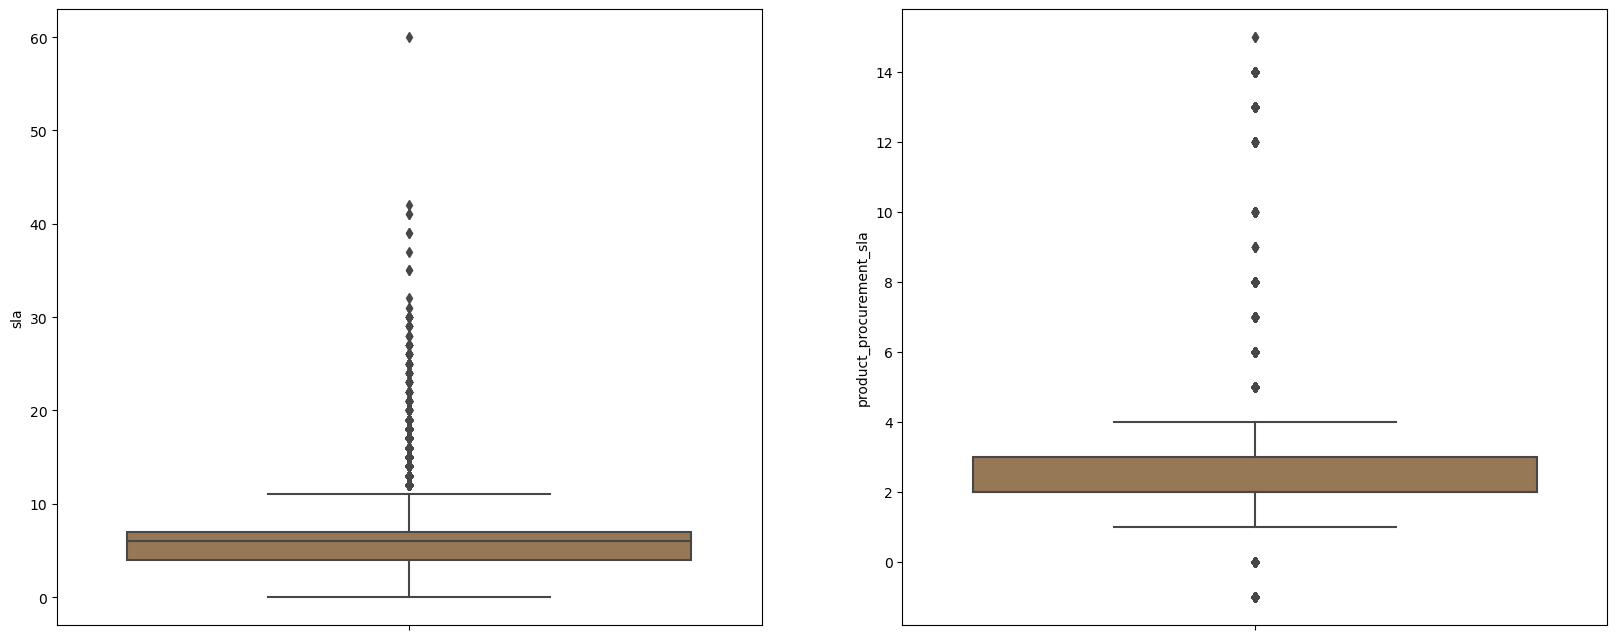

In [54]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.boxplot(y=df_copy.sla, palette=("cubehelix"))

plt.subplot(1,2,2)
sns.boxplot(y=df_copy.product_procurement_sla, palette=("cubehelix"))

<div class="alert alert-block alert-info">
We can see there are several outliers in columns sla or Service Level Agreement and product procurement sla which indicates instances of both procurement and delivery taking time.

<Axes: xlabel='product_procurement_sla', ylabel='Density'>

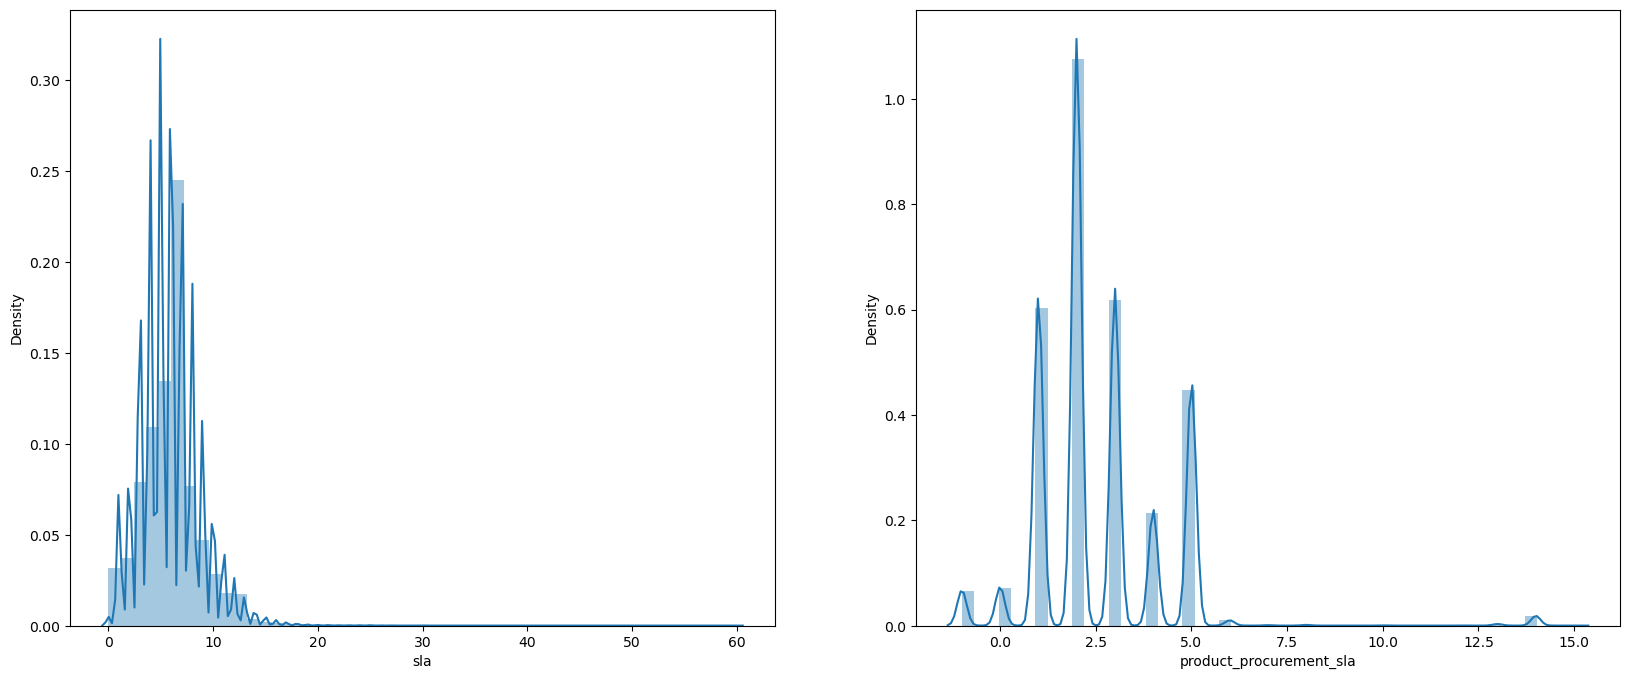

In [55]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.distplot(df_copy.sla)

plt.subplot(1,2,2)
sns.distplot(df_copy.product_procurement_sla)

<div class="alert alert-block alert-info">
We can see that the sla is positively skewed bell curve whereas the product procurement sla is multimodal curve.

In [56]:
df_copy.sla.describe(percentiles=[0.0,0.25,0.5,0.75,0.9,0.95,0.99,1.0])

count    523804.000000
mean          5.884676
std           2.696911
min           0.000000
0%            0.000000
25%           4.000000
50%           6.000000
75%           7.000000
90%           9.000000
95%          11.000000
99%          14.000000
100%         60.000000
max          60.000000
Name: sla, dtype: float64

In [57]:
df_copy.product_procurement_sla.describe(percentiles=[0.0,0.25,0.5,0.75,0.9,0.95,0.99,1.0])

count    523804.000000
mean          2.559847
std           1.714843
min          -1.000000
0%           -1.000000
25%           2.000000
50%           2.000000
75%           3.000000
90%           5.000000
95%           5.000000
99%           6.000000
100%         15.000000
max          15.000000
Name: product_procurement_sla, dtype: float64

In [58]:
#Converting negative values to the positive
len(df_copy.loc[df_copy.product_procurement_sla<0])

10901

In [59]:
df_copy.product_procurement_sla = abs(df_copy.product_procurement_sla)

In [60]:
df_copy.sla.std()

2.6969113975705605

In [61]:
#Taking three sigma values for outliers treatment
print(df_copy.sla.mean()+(3*(df_copy.sla.std())))
print(df_copy.sla.mean()-(3*(df_copy.sla.std())))

13.975410522025701
-2.206057863397664


In [62]:
df_copy.product_procurement_sla.std()

1.6510180203178295

In [63]:
#Taking three sigma values for outliers treatment
print(df_copy.product_procurement_sla.mean()+(3*(df_copy.product_procurement_sla.std())))
print(df_copy.product_procurement_sla.mean()-(3*(df_copy.product_procurement_sla.std())))

7.554523312811053
-2.3515848090959235


In [64]:
# Capping the values at three sigma value
len(df_copy[df_copy.sla > 14])

3382

In [66]:
# Let's cap the SLAs.
df_copy.loc[df_copy.sla > 14,'sla'] = 14

In [67]:
# Similarly, the min value of product procurement sla is 0 and the max value is 15. However, three sigma value is 7. 
print(len(df_copy[df_copy.product_procurement_sla > 7]))

3813


In [68]:
# Let's cap the product procurement SLAs.
df_copy.loc[df_copy.product_procurement_sla > 7,'product_procurement_sla'] = 7

In [69]:
df_copy.shape

(523804, 15)

In [70]:
df_copy.loc[df_copy.duplicated()]

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla


### <center> FEATURE ENGINEERING

In [72]:
#2. gmv (Gross Merchendising Value - The cost price at which the item is sold multiplied by number of units)

# Let's derive listing price, which is nothing but gmv/units

df_copy['listing_price'] = round((df_copy.gmv/df_copy.units),2)

In [74]:
#Let's check if there are any rows with listing price > MRP

len(df_copy.loc[df_copy.listing_price>df_copy.product_mrp])

0

In [75]:
# Let's now calculate the discount %, which is nothing but (mrp-list price)/mrp
df_copy['discount'] = round(((df_copy.product_mrp - df_copy.listing_price)/(df_copy.product_mrp)),2)

In [76]:
df_copy['discount'].describe()

count    523804.000000
mean          0.450383
std           0.243967
min           0.000000
25%           0.260000
50%           0.460000
75%           0.630000
max           1.000000
Name: discount, dtype: float64

In [77]:
# Total price
df_copy['Order_Item_Value'] = df_copy['product_mrp'] * df_copy['units']

In [78]:
# We can create the week number
df_copy['week'] = np.where(df_copy.Year == 2015, (df_copy.order_date.dt.week - pd.to_datetime('2015-07-01').week + 1), df_copy.order_date.dt.week+27)

# Dates like 2016-01-01 will be 53rd week as per ISO standard, hence the week value would be 53+27=80.
# We can make those values as week 27
df_copy.week.values[(df_copy.Year == 2016) & (df_copy.week == 80)] = 27

In [79]:
### Prepaid = '1' or COD = '0'
df_copy['order_payment_type'] = np.where(df_copy['order_payment_type'] == "Prepaid",1,0)

Seasonality and Trend related KPI¶

In [80]:
### Creating Calendar for the period
calendar = pd.DataFrame(pd.date_range('2015-07-01','2016-06-30').tolist(), columns = ['Date'])
### Mapping week in the calendar
calendar['week'] = calendar.Date.dt.week
### Jan 2016 should be week 54 ,not week 1.
calendar['week'] = np.where((calendar['week'] <= 26) & (calendar.Date.dt.year == 2016), calendar['week']+53, calendar['week'])

In [81]:
### Special Sales List

special_sales_list = ["2015-07-18","2015-07-19","2015-08-15","2015-08-16","2015-08-17","2015-08-28","2015-08-29",
                      "2015-08-30","2015-10-15","2015-10-16","2015-10-17","2015-11-07","2015-11-08","2015-11-09",
                      "2015-11-10","2015-11-11","2015-11-12","2015-11-13","2015-11-14","2015-12-25","2015-12-26",
                      "2015-12-27","2015-12-28","2015-12-29","2015-12-30","2015-12-31","2016-01-01","2016-01-02",
                      "2016-01-03","2016-01-20","2016-01-21","2016-01-22","2016-02-01","2016-02-02","2016-02-14",
                      "2016-02-15","2016-02-20","2016-02-21","2016-03-07","2016-03-08","2016-03-09","2016-05-25",
                      "2016-05-26","2016-05-27"]

ss_list = pd.DataFrame(special_sales_list,columns = ['Date'])
ss_list['Date'] = pd.to_datetime(ss_list['Date'])
ss_list['Special_sales'] = True

In [82]:
calendar = calendar.merge(ss_list, 'left')
calendar.fillna(False, inplace = True)

In [83]:
calendar['Special_sales'] = calendar['Special_sales'].astype(int)

In [84]:
calendar.head()

,Date,week,Special_sales
0,2015-07-01,27,0
1,2015-07-02,27,0
2,2015-07-03,27,0
3,2015-07-04,27,0
4,2015-07-05,27,0
